# Exercise 1

## Exercise 1.1

write a code that prints the following pattern. Try to use as few loops as possible.

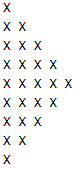

Avoid using trivial solutions like:

print('X')

print('X X')

print('X X X')

.....

print('X X X')

print('X X')

print('X')


In [ ]:


increment = 1
i = 1
while i > 0:
  print('X '*i, end=" ")
  print() #new line
  if i >= 5:
    increment = -1
  i += increment


X  
X X  
X X X  
X X X X  
X X X X X  
X X X X  
X X X  
X X  
X  


In [ ]:
print('\n'.join('X ' * (5 - abs(k)) for k in range(-4, 5)))

X 
X X 
X X X 
X X X X 
X X X X X 
X X X X 
X X X 
X X 
X 


## Exercise 1.2

Write a script that will sum all numbers in the following string. You can split each number into single digits, so for example, you can consider 45 to be 4 and 5

In [ ]:
input_str = "n45as29@#8ss6"
sum = 0
for char in input_str:
  if char >= '0' and char <= '9':
    sum += int(char)
print(sum)

34


## Exercise 1.3

Write a script that will convert an arbitrary integer to a binary number (the number will be represented as a string with only *0* and *1*). Avoid using the *bin()* function or any other pythons default functions

In [ ]:
#only prints
def print_bin(val):
  if (val // 2 > 0):
    print_bin(val // 2)
  print(f"{val%2}", end="")

### Creates a string
def to_bin(val):
  bin_val = []
  while (val > 0):
    bin_val.append(f"{val%2}")
    val //= 2
  str_val = "".join(bin_val[::-1])
  return str_val

print_bin(10)
print(f"\n{to_bin(10)}")


1010
1010


## Exercise 1.4 - The Fibonacci Sequence:

The Fibonacci Sequence is a series of numbers. The following number is found by adding up the two numbers before it. The first two numbers are 0 and 1. For example, 0, 1, 1, 2, 3, 5, 8, 13. The following number in this series above is 8 + 13 = 21


Your task is to implement a function *fibonacci* that takes an integer as an input and returns a list that contains all Fibonacci numbers with values lower than the input integer

Example:

*print(fibonaci(10))*

[0, 1, 1, 2, 3, 5, 8]


In [ ]:
def fibonacci(upper_threshold: int) -> list:
    fib_list = [0, 1]
    while (fib_list[-1] + fib_list[-2] < upper_threshold):
      new_val = fib_list[-1] + fib_list[-2]
      fib_list.append(new_val)
    return fib_list

print(fibonacci(40))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


#### Advanced

Try to implement the function using multiple approaches: *Iterative approach*, *Recusrion*, *Memoization*

## Exercise 1.5. -  Rock, Paper, Scissors game:

#### basic

*Rock, Paper, Scissors* is a well-known and straightforward game. If you do not know the rules, google them. We will write a code for the Rock, Paper, Scissors game where the user plays against a random computer. The code can be written into one function *rock_paper_scissors*.

Notes:
- This implementation uses the **random** library to enable the computer to make a random choice.
- Keyword **Input** may be helpful. Check it
- After the function is run, the program will ask you about your movement, which you type in
- The game is case-insensitive for user input (e.g., "rock", "Rock", and "ROCK" are all valid).
- This script plays one round of the game.
- The script prints the result ('You lose', 'You win', 'It is a tie')


In [ ]:
import random

def rock_paper_scissors() -> None:
    movements = ["rock", "paper", "scissors"]

    inp = input("Play with me! Write Rock, paper, or scissors\n").lower().strip()

    while (not inp in movements):
      inp = input(f"I do not know {inp}! Write Rock, paper, or scissors!\n").lower().strip()
    user_movement = movements.index(inp)
    PC_movement = random.randint(0,2)
    print(f"I play {movements[PC_movement]}!")

    if (user_movement == PC_movement):
      print("It is a tie")

    elif ((user_movement - PC_movement) % 3 == 1): # modulo over even negative number -> paper-rock, scissors-paper, rock-scissors
      print("You win!")
    else:
      print("You lose!")



rock_paper_scissors()

Play with me! Write Rock, paper, or scissors
rocky
I do not know rocky! Write Rock, paper, or scissors!
Rock
I play rock!
It is a tie


#### Advanced

Extend the Rock, Paper, Scissors game to be able to play *n* rounds.

Notes:
- The scrips will contain two counters - user score and computer score
- After each run, the script prints the current scores and rounds.
- When the number of rounds is reached, the script prints the result ('You lose', 'You win', 'It is a tie')

# Exercise 2

The purpose of this excercise is to practise working with NumPy library

## Exercise 2.1


In this exercise, you will work with NumPy arrays and learn how to efficiently modify and process them using both loops and vectorized operations. Your task is to:

1. Implement the function *create_array_nxn* that generates an n×n NumPy array filled with numbers from n² - 1 down to 0
2. Using a loop-based approach (for-loop, while-loop), implement the function *apply_threshold_loop* that takes any NumPy array and replaces all numbers below a user-defined threshold with 0.
3. Implement function *apply_threshold_vectorized* that performs the same operation as *apply_threshold_loop*, but without loops, using NumPy vectorized operations
4. Implement function *compare_performance* that compares the execution time of functions *apply_threshold_vectorized* and *apply_threshold_loop* with **time** library and print the results


**Additional Notes**:

- Ensure n is a positive integer (n > 0).
- Use the time library to measure execution times for performance comparison.
- The function *compare_performance(n, threshold)* should:
    - Generate an n×n array.
    - Apply both loop-based and vectorized thresholding.
    - Print execution times.

In [2]:
import numpy as np
import time

In [ ]:
def create_array_nxn(n: int) -> np.ndarray:
  vec = np.arange(n**2-1,-1, -1)
  return np.reshape(vec, (n,n))
print(create_array_nxn(4))

[[15 14 13 12]
 [11 10  9  8]
 [ 7  6  5  4]
 [ 3  2  1  0]]


In [ ]:
# %%timeit
def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
  for i in range(arr.size):
    if arr.flat[i] < threshold:
      arr.flat[i] = 0
  return arr

arr = create_array_nxn(4)
arr = apply_threshold_loop(arr, 6)
print(arr)

[[15 14 13 12]
 [11 10  9  8]
 [ 7  6  0  0]
 [ 0  0  0  0]]


In [ ]:
#testing of time consuption - %%timeit

#changes array in parameter and returns it
def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
  arr[arr<threshold] = 0
  return arr

print(apply_threshold_vectorized(create_array_nxn(4),8))

[[15 14 13 12]
 [11 10  9  8]
 [ 0  0  0  0]
 [ 0  0  0  0]]


In [ ]:
def compare_performance(n: int, threshold: int) -> None:
  a = create_array_nxn(n)
  b = create_array_nxn(n)
  start_loop = time.perf_counter()
  apply_threshold_loop(a, threshold)
  stop_loop = time.perf_counter()

  start_vec = time.perf_counter()
  apply_threshold_vectorized(b, threshold)
  stop_vec = time.perf_counter()

  print(f"Loop took {stop_loop-start_loop:.6f} seconds and vectorized took {stop_vec-start_vec:.6f} seconds")

compare_performance(2000,4)


Loop took 1.678760 seconds and vectorized took 0.007526 seconds


## Exercise 2.2 - Digi display

#### basic

The task will be to create a simulation of a Digi display that will be able to display an arbitrary integer
   
*hint: to show the image, use the library matplotlib.pyplot. Also, you may find function *np.concatenate* helpful

In [ ]:
def show_in_digi(input_integer: int) -> None:
    pass

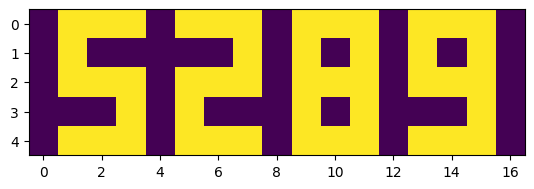

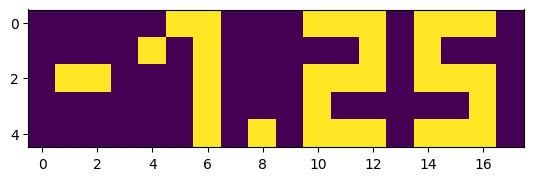

In [10]:
import matplotlib.pyplot as plt
numbs = {
      "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 1
      "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]), # 2
      "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 3
      "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]), # 4
      "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 5
      "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 6
      "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 7
      "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 8
      "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 9
      "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]), # 0
      " ": np.array([[0], [0], [0], [0], [0]]), # added blank column for better visualisation
      "-": np.array([[0, 0], [0, 0], [1,1], [0,0], [0,0]]),
      ".": np.array([[0], [0], [0], [0], [1]]),

  }

def show_in_digi(input_number: float) -> None:
  input_digits = str(input_number)

  digi_array = []
  for digit in input_digits:
    digi_array.append(numbs[" "])
    digi_array.append(numbs[digit])
  digi_array.append(numbs[" "])

  final_matrix = np.hstack(digi_array) # concatenate in horizontal direction

  plt.imshow(final_matrix)
  plt.show()

show_in_digi(5289)
show_in_digi(-1.25)


show_in_digi(5289) will show:


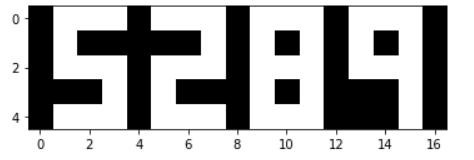

*hint2: you may find the following dict usefull*

In [ ]:
numbs = {
      "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 1
      "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]), # 2
      "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 3
      "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]), # 4
      "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 5
      "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 6
      "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 7
      "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 8
      "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 9
      "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]), # 0
  }

#### advanced

Extend your *show_in_digi* function to be able to display an arbitary float number and negative numbers

# Exercise 3 - Playing with California Housing Dataset

The purpose of this exercise is to learn basic operations of **pandas** library. Use *california_housing_dataset* you can find in google colab to do following operations:

In [12]:
import pandas as pd

# Colab provides this dataset in the 'sample_data' folder by default
dataset = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Verify it's loaded
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


- check what *dataset.describe()* does

In [13]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- display all rows where *total_bedrooms* column is bigger than 310

In [19]:
dataset[dataset['total_bedrooms']> 310]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
...,...,...,...,...,...,...,...,...,...
16994,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0


- drop also first and last row

In [23]:
dataset[dataset['total_bedrooms']> 310].iloc[1:-1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
...,...,...,...,...,...,...,...,...,...
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0
16994,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0


- save a mean of values in *households* columns to variable, using *matplotlib* display number of households in the graph (x-axis would be ID, y-axis - numbers of households) as dots with the same color, display also mean as a single line in the graph with different color as dots is

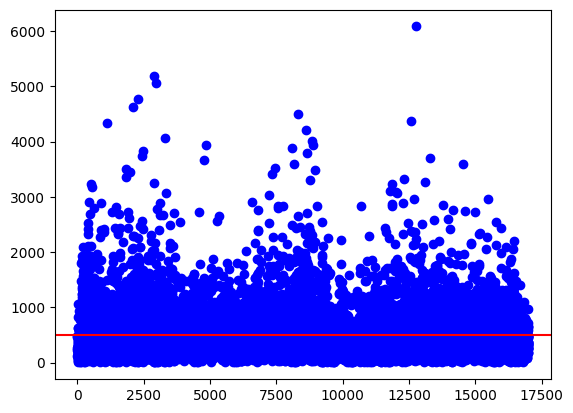

In [31]:
import matplotlib.pyplot as plt
mean_households = dataset['households'].mean()

x_axis = dataset.index
y_axis = dataset['households']

plt.figure(1)
plt.scatter(x_axis, y_axis, color='blue')
#old way - plt.plot(x_axis[[0,-1]], [mean_households, mean_households], color='red')

plt.axhline(y=mean_households, color='red', linestyle='-')


 - check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset

In [34]:
print(dataset.isnull().sum())
if (dataset.isnull().values.any()):
  print("Filled NaN with values")
  dataset = dataset.fillna(dataset.mean()) # refill NaN with mean of column

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


 - display *lat* and *long* into plot, *lat* would be on *x* axis and *long* on *y* axis

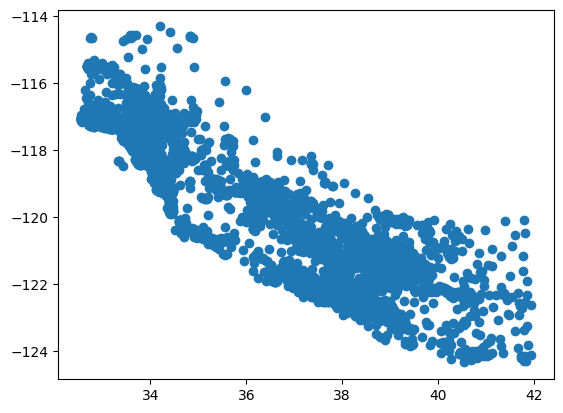

In [32]:
plt.scatter(dataset['latitude'], dataset['longitude'])

- choose two arbitrary columns and normalize all values inside using *min-max normalization*:

In [35]:
cols_to_fix = ['population', 'total_rooms']

# Apply the formula
# dataset[cols_to_fix].min() calculates the min for both columns at once
dataset[cols_to_fix] = (dataset[cols_to_fix] - dataset[cols_to_fix].min()) / (dataset[cols_to_fix].max() - dataset[cols_to_fix].min())

# Check the results
print(dataset[cols_to_fix].describe())

         population   total_rooms
count  17000.000000  17000.000000
mean       0.039984      0.069637
std        0.032172      0.057465
min        0.000000      0.000000
25%        0.022058      0.038487
50%        0.032624      0.056017
75%        0.048152      0.083017
max        1.000000      1.000000


- Create a Correlation Matrix from all columns

In [36]:
# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Display the matrix
print(corr_matrix)

                    longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.925208  ...      -0.015485           -0.044982
latitude            -0.925208  1.000000  ...      -0.080303           -0.144917
housing_median_age  -0.114250  0.016454  ...      -0.115932            0.106758
total_rooms          0.047010 -0.038773  ...       0.195383            0.130991
total_bedrooms       0.071802 -0.069373  ...      -0.013495            0.045783
population           0.101674 -0.111261  ...      -0.000638           -0.027850
households           0.059628 -0.074902  ...       0.007644            0.061031
median_income       -0.015485 -0.080303  ...       1.000000            0.691871
median_house_value  -0.044982 -0.144917  ...       0.691871            1.000000

[9 rows x 9 columns]
